In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 2021년 1월부터 6월까지 데이터
df1 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202101_202106).csv', encoding='cp949')

# 2021년 7월부터 12월까지 데이터
df2 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202107_202112).csv', encoding='cp949')

# 두 데이터프레임을 병합
df = pd.concat([df1, df2], ignore_index=True)

# 병합된 데이터프레임 출력
df

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,인천,김포,운양동 전원마을월드2단지,급속01,1547,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44
1,인천,시흥,LH퍼스트리움 아파트,완속03,3143,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38
2,남서울,강남,LH강남힐스테이트,급속01,6452,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33
3,강원,강릉,알펜시아리조트,급속02,6681,강원도 평창군 대관령면 솔봉로 325,급속,50.0,39.12,0,53,2021-01-01,2021-01-01 16:12:09,2021-01-01 17:05:27
4,대전세종충남,서대전,대전시립연정국악원 주차장,급속02,6175,대전광역시 서구 둔산대로 181,급속,50.0,30.42,0,42,2021-01-01,2021-01-01 23:14:50,2021-01-01 23:57:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,인천,부천,행복한마을 서해아파트,완속02,8628,"경기도 부천시 상동로 57 (상동, 행복한마을 서해그랑블)",완속,7.0,9.59,2,4,2021-10-17,2021-10-17 18:37:16,2021-10-17 20:41:57
2097146,제주,서귀포,서귀포지사,급속02,8819,제주특별자치도 서귀포시 신중로 56,급속,50.0,67.99,2,18,2021-10-17,2021-10-17 18:24:50,2021-10-17 20:43:29
2097147,경기북부,고양,홈플러스 고양터미널점,급속01,5886,경기도 고양시 일산동구 중앙로 1036,급속,50.0,0.17,0,1,2021-10-17,2021-10-17 13:25:21,2021-10-17 13:26:55
2097148,강원,강원직할,롯데캐슬 스카이클래스,완속03,6163,강원도 춘천시 방송길 70,완속,7.0,5.90,1,47,2021-10-17,2021-10-17 11:38:47,2021-10-17 13:26:19


In [4]:
df[['시', '구', '도로명주소']] = df['주소'].str.split(' ', n=2, expand=True)
df.head(3)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,인천,김포,운양동 전원마을월드2단지,급속01,1547,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44,경기도,김포시,전원로 44
1,인천,시흥,LH퍼스트리움 아파트,완속03,3143,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38,경기도,시흥시,동서로 1068 (조남동)
2,남서울,강남,LH강남힐스테이트,급속01,6452,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33,서울특별시,강남구,자곡동 자곡로3길 21


In [5]:
jeju = df[df['시'] == '제주특별자치도']
jeju

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
24,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)"
29,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13
33,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4
35,제주,서귀포,삼아 아파트,완속02,5241,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,7.80,1,29,2021-01-01,2021-01-01 21:14:36,2021-01-01 22:43:37,제주특별자치도,서귀포시,동홍동 태평로 536
41,제주,제주직할,아라인빌,완속01,7685,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,14.80,4,37,2021-01-01,2021-01-01 17:55:45,2021-01-01 22:33:40,제주특별자치도,제주시,제주대학로 64-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097129,제주,제주직할,노형아이파크,완속02,3519,제주특별자치도 제주시 노형동 원노형로 90,완속,7.0,18.90,3,7,2021-10-17,2021-10-16 22:08:32,2021-10-17 01:15:58,제주특별자치도,제주시,노형동 원노형로 90
2097135,제주,서귀포,중문메리디안,완속02,5849,제주특별자치도 서귀포시 중문동 1100로 36,완속,7.0,26.79,4,31,2021-10-17,2021-10-16 21:35:11,2021-10-17 02:06:26,제주특별자치도,서귀포시,중문동 1100로 36
2097137,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,32.33,5,54,2021-10-17,2021-10-16 21:05:09,2021-10-17 03:00:06,제주특별자치도,제주시,노형동 광평동로 66
2097143,제주,제주직할,제주으뜸마을LH 아파트,급속01,3610,제주특별자치도 제주시 노형동 진군1길 3,급속,50.0,16.88,0,29,2021-10-17,2021-10-17 12:22:40,2021-10-17 12:51:44,제주특별자치도,제주시,노형동 진군1길 3


In [6]:
# pd.read_excel('2022년+1월+관광객입도현황(확정치).xlsx')

In [7]:
df[['시', '구', '도로명주소']] = df['주소'].str.split(' ', n=2, expand=True)
df.head(3)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,인천,김포,운양동 전원마을월드2단지,급속01,1547,경기도 김포시 전원로 44,급속,50.0,28.92,0,49,2021-01-01,2021-01-01 21:34:13,2021-01-01 22:23:44,경기도,김포시,전원로 44
1,인천,시흥,LH퍼스트리움 아파트,완속03,3143,경기도 시흥시 동서로 1068 (조남동),완속,7.0,12.51,3,55,2021-01-01,2021-01-01 18:28:55,2021-01-01 22:24:38,경기도,시흥시,동서로 1068 (조남동)
2,남서울,강남,LH강남힐스테이트,급속01,6452,서울특별시 강남구 자곡동 자곡로3길 21,급속,50.0,26.37,0,38,2021-01-01,2021-01-01 21:46:05,2021-01-01 22:24:33,서울특별시,강남구,자곡동 자곡로3길 21


In [8]:
jeju = df[df['시'] == '제주특별자치도']
jeju

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
24,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)"
29,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13
33,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4
35,제주,서귀포,삼아 아파트,완속02,5241,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,7.80,1,29,2021-01-01,2021-01-01 21:14:36,2021-01-01 22:43:37,제주특별자치도,서귀포시,동홍동 태평로 536
41,제주,제주직할,아라인빌,완속01,7685,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,14.80,4,37,2021-01-01,2021-01-01 17:55:45,2021-01-01 22:33:40,제주특별자치도,제주시,제주대학로 64-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097129,제주,제주직할,노형아이파크,완속02,3519,제주특별자치도 제주시 노형동 원노형로 90,완속,7.0,18.90,3,7,2021-10-17,2021-10-16 22:08:32,2021-10-17 01:15:58,제주특별자치도,제주시,노형동 원노형로 90
2097135,제주,서귀포,중문메리디안,완속02,5849,제주특별자치도 서귀포시 중문동 1100로 36,완속,7.0,26.79,4,31,2021-10-17,2021-10-16 21:35:11,2021-10-17 02:06:26,제주특별자치도,서귀포시,중문동 1100로 36
2097137,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,32.33,5,54,2021-10-17,2021-10-16 21:05:09,2021-10-17 03:00:06,제주특별자치도,제주시,노형동 광평동로 66
2097143,제주,제주직할,제주으뜸마을LH 아파트,급속01,3610,제주특별자치도 제주시 노형동 진군1길 3,급속,50.0,16.88,0,29,2021-10-17,2021-10-17 12:22:40,2021-10-17 12:51:44,제주특별자치도,제주시,노형동 진군1길 3


In [9]:
jeju['충전량'].describe()

count    181589.000000
mean         22.165465
std         605.510075
min           0.002000
25%           9.300000
50%          16.300000
75%          26.690000
max      222153.350000
Name: 충전량, dtype: float64

In [10]:
# jeju.to_excel('제주21년1월부터12월.xlsx')

In [11]:
jeju[jeju['충전소명'].str.contains('차고지')]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
1094270,제주,서귀포,동광리버스차고지,급속02,11049,제주특별자치도 서귀포시 안덕면 한창로 599 (동광리),급속,100.0,2.69,0,3,2021-07-06,2021-07-06 15:38:21,2021-07-06 15:41:36,제주특별자치도,서귀포시,안덕면 한창로 599 (동광리)
1094276,제주,서귀포,동광리버스차고지,급속01,11048,제주특별자치도 서귀포시 안덕면 한창로 599 (동광리),급속,100.0,2.30,0,2,2021-07-06,2021-07-06 15:41:44,2021-07-06 15:44:39,제주특별자치도,서귀포시,안덕면 한창로 599 (동광리)
1094428,제주,서귀포,동광리버스차고지,급속01,11048,제주특별자치도 서귀포시 안덕면 한창로 599 (동광리),급속,100.0,28.45,0,28,2021-07-06,2021-07-06 16:16:53,2021-07-06 16:44:58,제주특별자치도,서귀포시,안덕면 한창로 599 (동광리)
1101147,제주,서귀포,동광리버스차고지,급속02,11049,제주특별자치도 서귀포시 안덕면 한창로 599 (동광리),급속,100.0,10.20,0,10,2021-07-06,2021-07-06 17:29:57,2021-07-06 17:40:04,제주특별자치도,서귀포시,안덕면 한창로 599 (동광리)
1102566,제주,서귀포,동광리버스차고지,급속02,11049,제주특별자치도 서귀포시 안덕면 한창로 599 (동광리),급속,100.0,16.95,0,15,2021-07-06,2021-07-06 16:41:54,2021-07-06 16:57:23,제주특별자치도,서귀포시,안덕면 한창로 599 (동광리)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092004,제주,서귀포,동광리버스차고지,급속02,11049,제주특별자치도 서귀포시 안덕면 한창로 599 (동광리),급속,100.0,14.27,0,20,2021-10-17,2021-10-17 14:03:24,2021-10-17 14:23:40,제주특별자치도,서귀포시,안덕면 한창로 599 (동광리)
2092034,제주,제주직할,국제대학교 버스차고지,급속02,10979,"제주특별자치도 제주시 516로 2870 (영평동, 제주국제대학교)",급속,100.0,39.31,0,27,2021-10-17,2021-10-17 11:38:28,2021-10-17 12:05:36,제주특별자치도,제주시,"516로 2870 (영평동, 제주국제대학교)"
2093871,제주,제주직할,국제대학교 버스차고지,급속04,10981,"제주특별자치도 제주시 516로 2870 (영평동, 제주국제대학교)",급속,50.0,17.11,0,21,2021-10-17,2021-10-17 08:02:25,2021-10-17 08:24:03,제주특별자치도,제주시,"516로 2870 (영평동, 제주국제대학교)"
2093902,제주,제주직할,국제대학교 버스차고지,급속04,10981,"제주특별자치도 제주시 516로 2870 (영평동, 제주국제대학교)",급속,50.0,17.11,0,23,2021-10-17,2021-10-17 13:41:35,2021-10-17 14:05:22,제주특별자치도,제주시,"516로 2870 (영평동, 제주국제대학교)"


In [12]:
# 충전량이 500이상인 데이터 (기기오류, 입력오류일 확률이높음)
jeju[jeju['충전량'] >= 200]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
716124,제주,제주직할,영산홍주택,완속02,7865,제주특별자치도 제주시 이도2동 405,완속,7.0,30546.50,2,2,2021-04-04,2021-04-04 14:24:55,2021-04-04 16:27:12,제주특별자치도,제주시,이도2동 405
1793249,제주,제주직할,서부소방서,급속01,706,제주특별자치도 제주시 한림읍 한림중앙로 150,급속,50.0,48134.36,0,21,2021-09-16,2021-09-16 08:40:59,2021-09-16 09:02:43,제주특별자치도,제주시,한림읍 한림중앙로 150
1797438,제주,제주직할,서부소방서,급속01,706,제주특별자치도 제주시 한림읍 한림중앙로 150,급속,50.0,48096.37,0,3,2021-09-17,2021-09-17 12:57:55,2021-09-17 13:01:30,제주특별자치도,제주시,한림읍 한림중앙로 150
1928860,제주,제주직할,서부소방서,급속01,706,제주특별자치도 제주시 한림읍 한림중앙로 150,급속,50.0,222153.35,1,5,2021-10-01,2021-10-01 08:30:45,2021-10-01 09:36:41,제주특별자치도,제주시,한림읍 한림중앙로 150
2043080,제주,제주직할,서부소방서,급속01,706,제주특별자치도 제주시 한림읍 한림중앙로 150,급속,50.0,107909.65,0,29,2021-10-12,2021-10-12 13:45:43,2021-10-12 14:14:43,제주특별자치도,제주시,한림읍 한림중앙로 150


In [13]:
jeju[jeju['충전소명']=='영산홍주택']['충전량'].mean()

44.51581071677105

In [14]:
jeju[jeju['충전소명']=='서부소방서'].value_counts()

본부  사업소   충전소명   충전기   충전기ID  주소                         충전기구분  충전용량  충전량    충전시간  충전분  충전종료일자      충전시작시각               충전종료시각               시        구    도로명주소        
제주  제주직할  서부소방서  급속01  706    제주특별자치도 제주시 한림읍 한림중앙로 150  급속     50.0  0.01   0     0    2021-03-26  2021-03-26 15:18:52  2021-03-26 15:19:14  제주특별자치도  제주시  한림읍 한림중앙로 150    1
                 급속02  707    제주특별자치도 제주시 한림읍 한림중앙로 150  급속     50.0  9.14   0     13   2021-03-27  2021-03-27 15:15:26  2021-03-27 15:29:00  제주특별자치도  제주시  한림읍 한림중앙로 150    1
                                                                      8.52   0     34   2021-10-17  2021-10-17 18:56:10  2021-10-17 19:31:04  제주특별자치도  제주시  한림읍 한림중앙로 150    1
                                                                      8.56   0     13   2021-02-06  2021-02-06 10:24:08  2021-02-06 10:37:31  제주특별자치도  제주시  한림읍 한림중앙로 150    1
                                                                      8.70   0     16   2021-05-14  2021-05-14 16:10:03  2021-05-1

In [15]:
jeju['구'].value_counts()

제주시     129321
서귀포시     50427
일주동로      1003
한경면        838
Name: 구, dtype: int64

In [16]:
# 영산홍주택이상치 정리
# 이상치를 식별할 기준 설정 (예: 충전량이 500 이상이면 이상치로 간주)
def is_outlier(value):
    return value >= 500

# 영산홍주택 충전소의 주소 가져오기
station_name = "영산홍주택"
station_address = jeju[jeju['충전소명'] == station_name]['주소'].iloc[0]

# 해당 주소의 평균값 계산 (이상치를 제외한 평균값)
address_mean = jeju[(jeju['주소'] == station_address) & ~jeju['충전량'].apply(is_outlier)]['충전량'].mean()

# 이상치를 해당 주소의 평균값으로 대체
def replace_outliers(row):
    if row['충전소명'] == station_name and is_outlier(row['충전량']):
        return address_mean
    else:
        return row['충전량']

jeju['충전량'] = jeju.apply(replace_outliers, axis=1)

In [17]:
# 서부소방서 이상치 정리
# 이상치를 식별할 기준 설정 (예: 충전량이 500 이상이면 이상치로 간주)
def is_outlier(value):
    return value >= 500

# 서부소방서 충전소의 주소 가져오기
station_name = "서부소방서"
station_address = jeju[jeju['충전소명'] == station_name]['주소'].iloc[0]

# 해당 주소의 평균값 계산 (이상치를 제외한 평균값)
address_mean = jeju[(jeju['주소'] == station_address) & ~jeju['충전량'].apply(is_outlier)]['충전량'].mean()

# 이상치를 해당 주소의 평균값으로 대체
def replace_outliers(row):
    if row['충전소명'] == station_name and is_outlier(row['충전량']):
        return address_mean
    else:
        return row['충전량']

jeju['충전량'] = jeju.apply(replace_outliers, axis=1)

In [18]:
jeju['충전량'].describe()

count    181589.000000
mean         19.650245
std          14.293821
min           0.002000
25%           9.300000
50%          16.300000
75%          26.690000
max         101.896000
Name: 충전량, dtype: float64

In [19]:
# jeju.to_excel('제주21년1월부터12월이상치제거.xlsx')

In [20]:
jeju['충전량'].sum()

3568268.318759137

In [21]:
jeju[jeju['충전소명']=='서부소방서']['충전량'].mean()

20.158471121177804

In [22]:
jeju[jeju['충전량'] >= 200]

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소


In [23]:
jeju['구'].value_counts()

제주시     129321
서귀포시     50427
일주동로      1003
한경면        838
Name: 구, dtype: int64

In [24]:
# 제주시 일주동로 제주시 넣어주기
def insert_city(row):
    if row['주소'] == '제주특별자치도 일주동로 61':
        return '제주특별자치도 제주시 일주동로 61'
    else:
        return row['주소']

jeju['주소'] = jeju.apply(insert_city, axis=1)

In [25]:
# 제주시 한경면 제주시 넣어주기
def insert_city(row):
    if row['주소'] == '제주특별자치도 한경면 녹차분재로 675':
        return '제주특별자치도 제주시 한경면 녹차분재로 675'
    else:
        return row['주소']

jeju['주소'] = jeju.apply(insert_city, axis=1)

In [26]:
jeju[['시', '구', '도로명주소']] = jeju['주소'].str.split(' ', n=2, expand=True)
jeju.head(3)

,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
24,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)"
29,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13
33,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4


In [27]:
jeju['구'].value_counts()

제주시     131162
서귀포시     50427
Name: 구, dtype: int64

In [28]:
# jeju.to_excel('제주21년1월부터12월이상치+주소정리1.xlsx')

In [29]:
#월별 지역별 충전량 합계와 충전소별 총 충전량

# 데이터를 DataFrame으로 변환합니다.
data = jeju
jeju_df = pd.DataFrame(data)

# 충전 종료 일자를 datetime 형식으로 변환합니다.
jeju_df['충전종료일자'] = pd.to_datetime(jeju_df['충전종료일자'])

# 월별로 데이터를 그룹화하고, 각 그룹별 충전량 합계를 계산합니다.
jeju_df['month'] = jeju_df['충전종료일자'].dt.month
monthly_charging = jeju_df.groupby(['시', 'month'])['충전량'].sum().reset_index()

# 지역별(제주시, 서귀포시) 월별 충전량 합계를 출력합니다.
print(monthly_charging)

# 충전소별 총 충전량을 계산합니다.
charging_station_total = jeju_df.groupby('충전소명')['충전량'].sum().reset_index()

# 충전소별 총 충전량을 내림차순으로 정렬합니다.
charging_station_total = charging_station_total.sort_values('충전량', ascending=False)

# 충전소별 총 충전량을 출력합니다.
print(charging_station_total)

         시  month            충전량
0  제주특별자치도      1  417898.503000
1  제주특별자치도      2  419359.892000
2  제주특별자치도      3  460408.598000
3  제주특별자치도      4  425414.295875
4  제주특별자치도      5  205884.515000
5  제주특별자치도      7  473657.103000
6  제주특별자치도      8  461142.408000
7  제주특별자치도      9  439341.620942
8  제주특별자치도     10  265161.382942
              충전소명         충전량
289          종합경기장  220244.330
228           제주공항   97465.847
121          서귀포지사   89116.600
224      제주 삼양 유적지   60561.070
331          한림체육관   59612.560
..             ...         ...
249  제주소방서 항만119센터       4.230
318         한경면체육관       3.790
334          한전APT       2.900
129         서제주변환소       2.370
47   대정감협 인근 공영주차장       1.960

[353 rows x 2 columns]


In [30]:
jeju[jeju['충전소명'] == '종합경기장']['충전량'].describe()

count    12357.000000
mean        17.823447
std         12.337348
min          0.010000
25%          9.170000
50%         15.210000
75%         23.150000
max         77.500000
Name: 충전량, dtype: float64

In [31]:
data = jeju
jeju_df = pd.DataFrame(data)

# 충전 종료 일자를 datetime 형식으로 변환합니다.
jeju_df['충전종료일자'] = pd.to_datetime(jeju_df['충전종료일자'])

# 월별로 데이터를 그룹화하고, 각 그룹별 충전량 합계를 계산합니다.
jeju_df['month'] = jeju_df['충전종료일자'].dt.month
monthly_charging_by_station = jeju_df.groupby(['구', '충전소명', 'month'])['충전량'].sum().reset_index()

# 결과를 출력합니다.
print(monthly_charging_by_station)

         구         충전소명  month      충전량
0     서귀포시  가시리 조랑말체험공원      1   284.46
1     서귀포시  가시리 조랑말체험공원      2   395.12
2     서귀포시  가시리 조랑말체험공원      3  2304.53
3     서귀포시  가시리 조랑말체험공원      4  1513.76
4     서귀포시  가시리 조랑말체험공원      5   201.84
...    ...          ...    ...      ...
2303   제주시    화북주공2 아파트      7  7181.07
2304   제주시    화북주공2 아파트      8  6982.70
2305   제주시    화북주공2 아파트      9  5270.34
2306   제주시    화북주공2 아파트     10  3154.70
2307   제주시  환경성질환예방관리센터      8    27.20

[2308 rows x 4 columns]


In [32]:
# 1. 충전기 구분 추가 및 월별로 그룹화
jeju['month'] = jeju['충전종료일자'].dt.to_period('M')
monthly_charging_by_type = jeju.groupby(['구', '충전소명', 'month', '충전기구분'])['충전량'].sum().reset_index()

# 2. 급속 및 완속 충전기 월별 충전량 비교를 위한 데이터 프레임 생성
monthly_charging_by_type_pivot1 = monthly_charging_by_type.pivot_table(index=['구', '충전소명', 'month'], values='충전량').reset_index()

# 새로운 데이터 프레임 출력
print(monthly_charging_by_type_pivot1)

         구         충전소명    month       충전량
0     서귀포시  가시리 조랑말체험공원  2021-01   284.460
1     서귀포시  가시리 조랑말체험공원  2021-02   395.120
2     서귀포시  가시리 조랑말체험공원  2021-03  2304.530
3     서귀포시  가시리 조랑말체험공원  2021-04  1513.760
4     서귀포시  가시리 조랑말체험공원  2021-05   201.840
...    ...          ...      ...       ...
2303   제주시    화북주공2 아파트  2021-07  3590.535
2304   제주시    화북주공2 아파트  2021-08  3491.350
2305   제주시    화북주공2 아파트  2021-09  2635.170
2306   제주시    화북주공2 아파트  2021-10  1577.350
2307   제주시  환경성질환예방관리센터  2021-08    27.200

[2308 rows x 4 columns]


In [33]:
# monthly_charging_by_type_pivot1.to_csv('2021년제주충전량마지막.csv')

In [34]:
# 1. 충전기 구분 추가 및 월별로 그룹화
jeju['month'] = jeju['충전종료일자'].dt.to_period('M')
monthly_charging_by_type = jeju.groupby(['시', '충전소명', 'month', '충전기구분'])['충전량'].sum().reset_index()

# 2. 급속 및 완속 충전기 월별 충전량 비교를 위한 데이터 프레임 생성
monthly_charging_by_type_pivot = monthly_charging_by_type.pivot_table(index=['시', '충전소명', 'month'], columns='충전기구분', values='충전량').reset_index()

# 새로운 데이터 프레임 출력
print(monthly_charging_by_type_pivot)


충전기구분        시    충전소명    month       급속     완속
0      제주특별자치도  LH제주본부  2021-01  2655.47    NaN
1      제주특별자치도  LH제주본부  2021-02  2795.98    NaN
2      제주특별자치도  LH제주본부  2021-03  3364.22    NaN
3      제주특별자치도  LH제주본부  2021-04  3080.38    NaN
4      제주특별자치도  LH제주본부  2021-05  1567.27    NaN
...        ...     ...      ...      ...    ...
2303   제주특별자치도   흥도빌라트  2021-05      NaN  257.5
2304   제주특별자치도   흥도빌라트  2021-07      NaN  449.2
2305   제주특별자치도   흥도빌라트  2021-08      NaN  379.6
2306   제주특별자치도   흥도빌라트  2021-09      NaN  382.8
2307   제주특별자치도   흥도빌라트  2021-10      NaN  212.7

[2308 rows x 5 columns]


In [35]:
monthly_charging_by_type_pivot.fillna(0, inplace=True)
monthly_charging_by_type_pivot

충전기구분,시,충전소명,month,급속,완속
0,제주특별자치도,LH제주본부,2021-01,2655.47,0.0
1,제주특별자치도,LH제주본부,2021-02,2795.98,0.0
2,제주특별자치도,LH제주본부,2021-03,3364.22,0.0
3,제주특별자치도,LH제주본부,2021-04,3080.38,0.0
4,제주특별자치도,LH제주본부,2021-05,1567.27,0.0
...,...,...,...,...,...
2303,제주특별자치도,흥도빌라트,2021-05,0.00,257.5
2304,제주특별자치도,흥도빌라트,2021-07,0.00,449.2
2305,제주특별자치도,흥도빌라트,2021-08,0.00,379.6
2306,제주특별자치도,흥도빌라트,2021-09,0.00,382.8


In [36]:
# monthly_charging_by_type_pivot.to_csv('2021년제주충전량.csv')

In [37]:
# 급속 충전기와 완속 충전기의 총 충전량
total_fast_charging = monthly_charging_by_type_pivot['급속'].sum()
total_slow_charging = monthly_charging_by_type_pivot['완속'].sum()

print("급속 충전기 총 충전량:", total_fast_charging)
print("완속 충전기 총 충전량:", total_slow_charging)

급속 충전기 총 충전량: 2498021.1138844844
완속 충전기 총 충전량: 1070247.2048746517


In [53]:
# 월별 급속/완속 충전기의 총 충전량
monthly_charging_by_type = monthly_charging_by_type_pivot.groupby('month')[['급속', '완속']].sum().reset_index()
monthly_charging_by_type

충전기구분,month,급속,완속
0,2021-01,295243.123000,122655.380000
1,2021-02,299956.642000,119403.250000
2,2021-03,326181.058000,134227.540000
3,2021-04,294309.161000,131105.134875
4,2021-05,142847.625000,63036.890000
5,2021-07,328219.573000,145437.530000
6,2021-08,317156.898000,143985.510000
7,2021-09,304159.260942,135182.360000
8,2021-10,189947.772942,75213.610000


In [103]:
monthly_charging_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   9 non-null      datetime64[ns]
 1   급속      9 non-null      float64       
 2   완속      9 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 344.0 bytes


In [104]:
# 2021년 6월 결측치 채우기
monthly_charging_by_type.loc[5, ['급속', '완속']] = monthly_charging_by_type.loc[[4, 6], ['급속', '완속']].mean().values

monthly_charging_by_type = monthly_charging_by_type.append({
    'month': pd.to_datetime('2021-06'),
    '급속': monthly_charging_by_type.loc[4, '급속'],
    '완속': monthly_charging_by_type.loc[4, '완속']
}, ignore_index=True)

monthly_charging_by_type['month'] = pd.to_datetime(monthly_charging_by_type['month'], format='%Y-%m')
monthly_charging_by_type = monthly_charging_by_type.sort_values('month').reset_index(drop=True)

print(monthly_charging_by_type)

       month             급속             완속
0 2021-01-01  295243.123000  122655.380000
1 2021-02-01  299956.642000  119403.250000
2 2021-03-01  326181.058000  134227.540000
3 2021-04-01  294309.161000  131105.134875
4 2021-05-01  142847.625000   63036.890000
5 2021-06-01  142847.625000   63036.890000
6 2021-07-01  230002.261500  103511.200000
7 2021-08-01  317156.898000  143985.510000
8 2021-09-01  304159.260942  135182.360000
9 2021-10-01  189947.772942   75213.610000


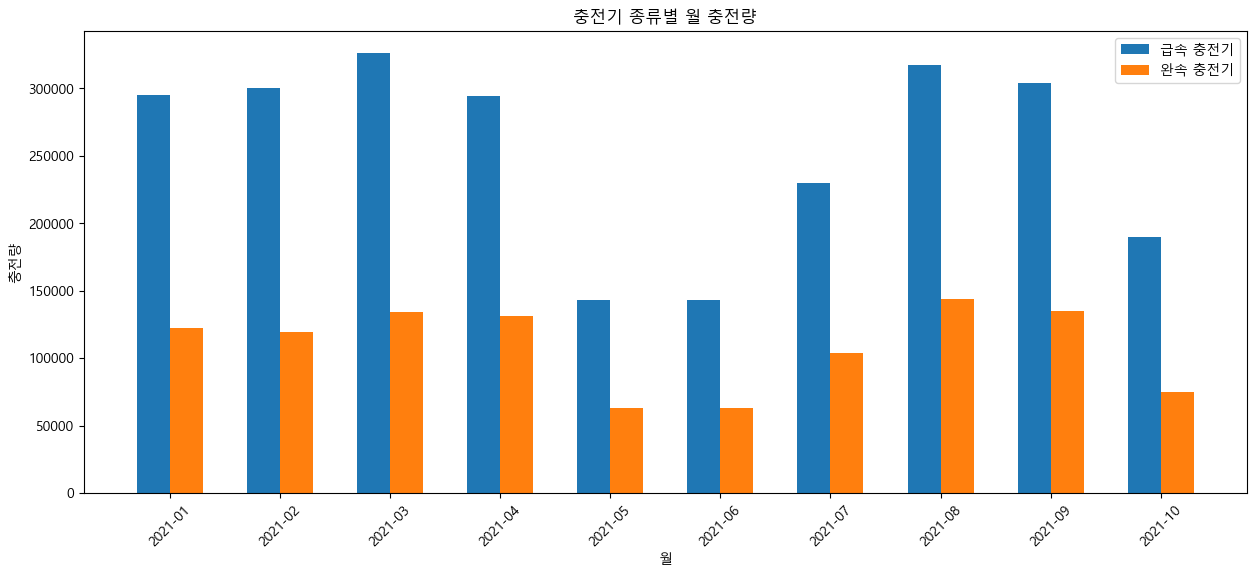

In [111]:
plt.figure(figsize=(15, 6))
width = 0.3
x = np.arange(len(monthly_charging_by_type['month']))

plt.bar(x - width/2, monthly_charging_by_type['급속'], width, label='급속 충전기')
plt.bar(x + width/2, monthly_charging_by_type['완속'], width, label='완속 충전기')

plt.xlabel('월')
plt.ylabel('충전량')
plt.title('충전기 종류별 월 충전량')
x_labels = monthly_charging_by_type['month'].dt.strftime('%Y-%m')
plt.xticks(x, x_labels, rotation=45)
plt.legend()
plt.show()


In [65]:
monthly_df = monthly_charging_by_type.set_index('month')
monthly_df

충전기구분,급속,완속
month,,
2021-01,295243.123000,122655.380000
2021-02,299956.642000,119403.250000
2021-03,326181.058000,134227.540000
2021-04,294309.161000,131105.134875
2021-05,142847.625000,63036.890000
2021-07,328219.573000,145437.530000
2021-08,317156.898000,143985.510000
2021-09,304159.260942,135182.360000
2021-10,189947.772942,75213.610000


In [69]:
# 2021-06 결측치 채우기
may_avg = monthly_df.loc['2021-05'].mean()
jul_avg = monthly_df.loc['2021-07'].mean()
jun_value = (may_avg + jul_avg) / 2
monthly_df.loc['2021-06'] = jun_value

In [79]:
monthly_df

충전기구분,급속,완속
month,,
2021-01,295243.123000,122655.380000
2021-02,299956.642000,119403.250000
2021-03,326181.058000,134227.540000
2021-04,294309.161000,131105.134875
2021-05,142847.625000,63036.890000
2021-07,328219.573000,145437.530000
2021-08,317156.898000,143985.510000
2021-09,304159.260942,135182.360000
2021-10,189947.772942,75213.610000


In [87]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2021-01 to 2021-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   급속      10 non-null     float64
 1   완속      10 non-null     float64
dtypes: float64(2)
memory usage: 240.0+ bytes


In [86]:
monthly_charging_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype    
---  ------  --------------  -----    
 0   month   9 non-null      period[M]
 1   급속      9 non-null      float64  
 2   완속      9 non-null      float64  
dtypes: float64(2), period[M](1)
memory usage: 344.0 bytes


In [67]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 9 entries, 2021-01 to 2021-10
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   급속      9 non-null      float64
 1   완속      9 non-null      float64
dtypes: float64(2)
memory usage: 516.0 bytes


In [39]:
# monthly_charging_by_type.to_csv('21년월별충전량.csv')

In [40]:
monthly_charging_by_type['month'] = monthly_charging_by_type['month'].astype(str)

In [41]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

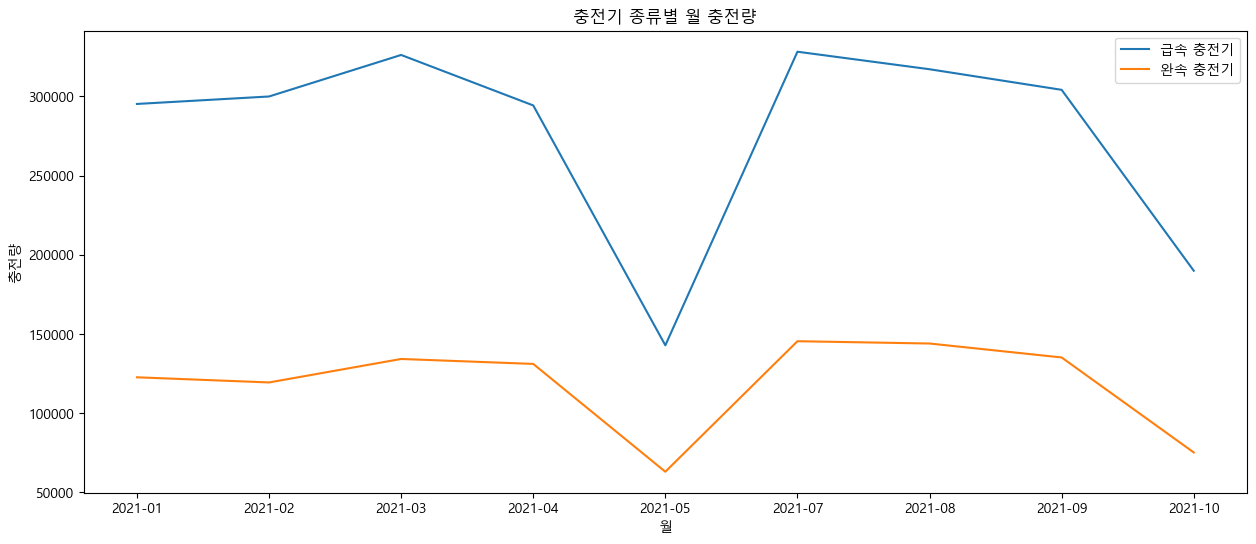

In [42]:
plt.figure(figsize=(15, 6))
plt.plot(monthly_charging_by_type['month'], monthly_charging_by_type['급속'], label="급속 충전기")
plt.plot(monthly_charging_by_type['month'], monthly_charging_by_type['완속'], label="완속 충전기")
plt.xlabel('월')
plt.ylabel('충전량')
plt.title('충전기 종류별 월 충전량')
plt.legend()
plt.show()


In [88]:
plt.figure(figsize=(15, 6))
width = 0.3
x = np.arange(len(monthly_charging_by_type['month']))

plt.bar(x - width/2, monthly_charging_by_type['급속'], width, label='급속 충전기')
plt.bar(x + width/2, monthly_charging_by_type['완속'], width, label='완속 충전기')

plt.xlabel('월')
plt.ylabel('충전량')
plt.title('충전기 종류별 월 충전량')
plt.xticks(x, monthly_charging_by_type['month'], rotation=45)
plt.legend()
plt.show()

KeyError: 'month'

<Figure size 1500x600 with 0 Axes>

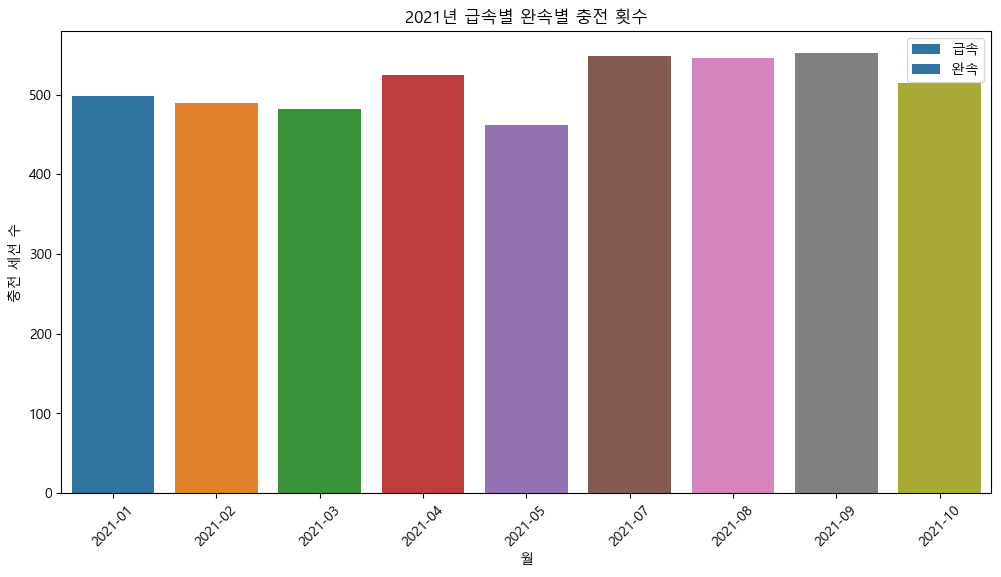

In [44]:
# 데이터를 2020년과 2021년으로 필터링
# monthly_charging_by_type_2020 = monthly_charging_by_type_pivot[(monthly_charging_by_type_pivot['month'].dt.year == 2020)]
monthly_charging_by_type_2021 = monthly_charging_by_type_pivot[(monthly_charging_by_type_pivot['month'].dt.year == 2021)]

# 급속별 완속별 충전 횟수 계산
# monthly_charging_count_2020 = monthly_charging_by_type_2020.groupby('month')[['급속', '완속']].count().reset_index()
monthly_charging_count_2021 = monthly_charging_by_type_2021.groupby('month')[['급속', '완속']].count().reset_index()

# # 2020년 급속별 완속별 충전 횟수 시각화
# plt.figure(figsize=(12, 6))
# sns.barplot(x='month', y='급속', data=monthly_charging_count_2020, label='급속')
# sns.barplot(x='month', y='완속', data=monthly_charging_count_2020, label='완속', bottom=monthly_charging_count_2020['급속'])
# plt.title('2020년 급속별 완속별 충전 횟수')
# plt.xlabel('월')
# plt.ylabel('충전 세션 수')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

# 2021년 급속별 완속별 충전 횟수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='급속', data=monthly_charging_count_2021, label='급속')
sns.barplot(x='month', y='완속', data=monthly_charging_count_2021, label='완속', bottom=monthly_charging_count_2021['급속'])
plt.title('2021년 급속별 완속별 충전 횟수')
plt.xlabel('월')
plt.ylabel('충전 세션 수')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [45]:
# 1. 충전기 구분 추가 및 월별로 그룹화
jeju['month'] = jeju['충전종료일자'].dt.to_period('M')
monthly_charging_by_type = jeju.groupby(['구', '충전소명', 'month', '충전기구분'])['충전량'].sum().reset_index()

# 2. 급속 및 완속 충전기 월별 충전량 비교를 위한 데이터 프레임 생성
monthly_charging_by_type_pivot = monthly_charging_by_type.pivot_table(index=['구', '충전소명', 'month'], columns='충전기구분', values='충전량').reset_index()

# 새로운 데이터 프레임 출력
print(monthly_charging_by_type_pivot)


충전기구분     구         충전소명    month       급속       완속
0      서귀포시  가시리 조랑말체험공원  2021-01   284.46      NaN
1      서귀포시  가시리 조랑말체험공원  2021-02   395.12      NaN
2      서귀포시  가시리 조랑말체험공원  2021-03  2304.53      NaN
3      서귀포시  가시리 조랑말체험공원  2021-04  1513.76      NaN
4      서귀포시  가시리 조랑말체험공원  2021-05   201.84      NaN
...     ...          ...      ...      ...      ...
2303    제주시    화북주공2 아파트  2021-07  2969.25  4211.82
2304    제주시    화북주공2 아파트  2021-08  2268.25  4714.45
2305    제주시    화북주공2 아파트  2021-09   418.93  4851.41
2306    제주시    화북주공2 아파트  2021-10   648.32  2506.38
2307    제주시  환경성질환예방관리센터  2021-08    27.20      NaN

[2308 rows x 5 columns]


In [46]:
monthly_charging_by_type_pivot.fillna(0, inplace=True)

In [47]:
# monthly_charging_by_type_pivot.to_csv('monthly_charging_by_station2021.csv')

In [48]:
monthly_charging_by_type_pivot

충전기구분,구,충전소명,month,급속,완속
0,서귀포시,가시리 조랑말체험공원,2021-01,284.46,0.00
1,서귀포시,가시리 조랑말체험공원,2021-02,395.12,0.00
2,서귀포시,가시리 조랑말체험공원,2021-03,2304.53,0.00
3,서귀포시,가시리 조랑말체험공원,2021-04,1513.76,0.00
4,서귀포시,가시리 조랑말체험공원,2021-05,201.84,0.00
...,...,...,...,...,...
2303,제주시,화북주공2 아파트,2021-07,2969.25,4211.82
2304,제주시,화북주공2 아파트,2021-08,2268.25,4714.45
2305,제주시,화북주공2 아파트,2021-09,418.93,4851.41
2306,제주시,화북주공2 아파트,2021-10,648.32,2506.38


In [49]:
jeju.groupby('충전기구분').sum()

,충전기ID,충전용량,충전량,충전시간,충전분
충전기구분,,,,,
급속,13438879247,6550000.0,2.498021e+06,53110,3472754
완속,224648260,349279.0,1.070247e+06,166667,1413691
